In [46]:
import pandas as pd
import numpy as np
data = pd.read_csv('wine_red.csv',sep = ';')

# copy the data
df_scaled = data.copy()
for column in df_scaled.columns:
    df_scaled[column] = df_scaled[column]  / df_scaled[column].abs().max()

df_scaled_shape = df_scaled.shape
df_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.465409,0.443038,0.00,0.122581,0.124386,0.152778,0.117647,0.994132,0.875312,0.280,0.630872,0.625
1,0.490566,0.556962,0.00,0.167742,0.160393,0.347222,0.231834,0.993135,0.798005,0.340,0.657718,0.625
2,0.490566,0.481013,0.04,0.148387,0.150573,0.208333,0.186851,0.993335,0.812968,0.325,0.657718,0.625
3,0.704403,0.177215,0.56,0.122581,0.122750,0.236111,0.207612,0.994331,0.788030,0.290,0.657718,0.750
4,0.465409,0.443038,0.00,0.122581,0.124386,0.152778,0.117647,0.994132,0.875312,0.280,0.630872,0.625


In [68]:
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from numpy import random


def train_AE(df_scaled, df_scaled_shape, epch = 400):
    #--------------------Define dataset-------------------------
    class StateDataset(Dataset):

        def __init__(self):
            # data loading
            state = np.float32(data)
            self.st = torch.from_numpy(state)
            self.n_samples = state.shape[0]

        def __getitem__(self, index):
            return self.st[index]

        def __len__(self):
            return self.n_samples

    dataset = StateDataset()

    # Dataloader loads data for training
    loader = DataLoader(dataset = dataset,batch_size = 64, shuffle = True)

    # Define Autoencoder architecture
    class AE(torch.nn.Module):
        def __init__(self):
            super().__init__()

            self.vec_shape = df_scaled_shape
            self.encoder = torch.nn.Sequential(
                torch.nn.Linear(self.vec_shape[1], 8),
                torch.nn.ELU(),
                torch.nn.Linear(8,4)
            )

            # Building an linear decoder with Linear
            # layer followed by ELU activation function
            self.decoder = torch.nn.Sequential(
                torch.nn.Linear(4,8),
                torch.nn.ELU(),
                torch.nn.Linear(8, self.vec_shape[1]),
            )

        def forward(self, x):
            encoded = self.encoder(x)
            decoded = self.decoder(encoded)
            return decoded

    model = AE() # Model Initialization
    print(model)

    loss_function = torch.nn.MSELoss()  # Validation using MSE Loss function

    optimizer = torch.optim.Adam(model.parameters(),
                             lr = 1e-3,
                             weight_decay = 1e-5) # Using an Adam Optimizer

    #------------Training loop-------------------------------
    epochs = epch
    outputs = []
    losses = []
    for epoch in range(epochs):
        for i,(a) in enumerate(loader):
          reconstructed = model(a) # Output of Autoencoder

          # Calculating the loss function
          loss = loss_function(reconstructed,a)

          # The gradients are set to zero,
          # the the gradient is computed and stored.
          # .step() performs parameter update
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()

          # Storing the losses in a list for plotting
          if i%50 == 0:
              losses.append(loss)
        print(f'Epoch:{epoch+1}, Loss:{loss.item():.4f}')
        outputs.append((epochs, a, reconstructed))
    mod = model.state_dict()
    # Defining the Plot Style
    plt.style.use('fivethirtyeight')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')

    # Plotting the last 100 values
    plt.plot(losses)
    plt.show()

    return mod


AE(
  (encoder): Sequential(
    (0): Linear(in_features=12, out_features=8, bias=True)
    (1): ELU(alpha=1.0)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=4, out_features=8, bias=True)
    (1): ELU(alpha=1.0)
    (2): Linear(in_features=8, out_features=12, bias=True)
  )
)
Epoch:1, Loss:260.4030
Epoch:2, Loss:368.2685
Epoch:3, Loss:272.8694
Epoch:4, Loss:192.4794
Epoch:5, Loss:106.9812
Epoch:6, Loss:53.6977
Epoch:7, Loss:21.3262
Epoch:8, Loss:15.5224
Epoch:9, Loss:14.4979
Epoch:10, Loss:12.7306
Epoch:11, Loss:13.3861
Epoch:12, Loss:10.4908
Epoch:13, Loss:11.6512
Epoch:14, Loss:8.6800
Epoch:15, Loss:9.4222
Epoch:16, Loss:9.5505
Epoch:17, Loss:8.5616
Epoch:18, Loss:7.6306
Epoch:19, Loss:9.3655
Epoch:20, Loss:13.2397
Epoch:21, Loss:6.4368
Epoch:22, Loss:7.9182
Epoch:23, Loss:6.9777
Epoch:24, Loss:14.9599
Epoch:25, Loss:7.2040
Epoch:26, Loss:7.1705
Epoch:27, Loss:7.0146
Epoch:28, Loss:6.8819
Epoch:29, Loss:6.6251
Epoch

Epoch:353, Loss:0.4321
Epoch:354, Loss:0.7053
Epoch:355, Loss:0.2868
Epoch:356, Loss:0.4887
Epoch:357, Loss:0.2702
Epoch:358, Loss:0.2271
Epoch:359, Loss:0.2400
Epoch:360, Loss:0.3265
Epoch:361, Loss:0.2105
Epoch:362, Loss:0.5135
Epoch:363, Loss:0.3865
Epoch:364, Loss:0.4079
Epoch:365, Loss:0.2159
Epoch:366, Loss:0.2467
Epoch:367, Loss:0.3180
Epoch:368, Loss:0.2722
Epoch:369, Loss:0.3396
Epoch:370, Loss:0.1971
Epoch:371, Loss:0.1878
Epoch:372, Loss:0.2334
Epoch:373, Loss:0.2018
Epoch:374, Loss:0.3064
Epoch:375, Loss:0.2356
Epoch:376, Loss:0.2938
Epoch:377, Loss:0.3239
Epoch:378, Loss:0.4560
Epoch:379, Loss:0.2630
Epoch:380, Loss:0.5668
Epoch:381, Loss:0.3162
Epoch:382, Loss:0.5596
Epoch:383, Loss:0.2911
Epoch:384, Loss:0.2522
Epoch:385, Loss:0.3664
Epoch:386, Loss:0.3995
Epoch:387, Loss:0.2765
Epoch:388, Loss:0.4101
Epoch:389, Loss:0.2764
Epoch:390, Loss:0.3148
Epoch:391, Loss:0.4089
Epoch:392, Loss:0.2217
Epoch:393, Loss:0.3984
Epoch:394, Loss:0.5106
Epoch:395, Loss:0.4218
Epoch:396, 

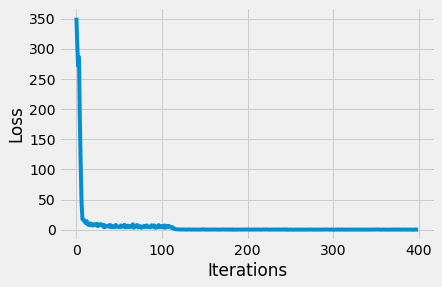

In [69]:
mod = train_AE(df_scaled, df_scaled_shape) 